In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tov
from importlib import reload

In [3]:
# Conversion factors
L_geom2cgs = 1.476701332464468e+05 
G_cgs = 6.674e-8
c_cgs= 2.99792458e10
rho_geom2cgs = c_cgs**2 / (G_cgs * L_geom2cgs**2)
p_geom2cgs = c_cgs**4 / (G_cgs * L_geom2cgs**2)

In [4]:
def K_cgs (K_geom, Gamma):
    return K_geom * p_geom2cgs/ (rho_geom2cgs) ** Gamma

def K_geom (K_cgs, Gamma):
    return K_cgs / p_geom2cgs * (rho_geom2cgs) ** Gamma

print(K_cgs(100, 2))
print(K_geom(145536, 2))

145536.3691206779
99.99974637220915


In [29]:
0.0031077676120598837*rho_geom2cgs/1e14

19.191919191919194

In [54]:
reload(tov)


# Central density in cgs
rho0_cgs = 7.95e14
rho0_cgs = 12.065e14
K=100.
Gamma=2.
rmax=30

#rho0_cgs = 1e10
#Gamma=4./3.
#K=K_geom(4.897e14, Gamma)
#rmax=5000

# Transform to geometrized units (G=c=1, M_sun=1)
rho0=rho0_cgs/rho_geom2cgs

# Solve the TOV equation
R, Riso, M, r, riso, rho, p, ene, cs2, alpha, grr, m, phi = tov.tov(rho0,Gamma=Gamma, K=K, Nout=3230, rmax=rmax)

print("M    =",M," M_sun")
print("R    =",R," = ", R* L_geom2cgs * 1e-5," km")
print("Riso =", Riso, " = ",Riso* L_geom2cgs * 1e-5," km")

# Reference model: K=100, Gamma=2, rho0=7.95e14 g ==> M = 1.40, R = 14.1 km (Cerdá-Durán et al 2005)
# with Nout=323 and rmax=30 you get 100 points inside the star

#--- Output to file ---

# Points inside the star
idx=np.where(p>0)
# convert to cgs
r_cgs=r[idx]*L_geom2cgs
riso_cgs=riso[idx]*L_geom2cgs
rho_cgs=rho[idx]*rho_geom2cgs
p_cgs=p[idx]*p_geom2cgs
# Convert to GREAT units (G=c=1 & cm)
Msun=1.477e5 # Solar mass in geometrized units
r_great=r[idx]*Msun
riso_great=riso[idx]*Msun
rho_great=rho[idx]/Msun**2
p_great=p[idx]/Msun**2
# specifical internal energy (dimensionless)
eps=np.zeros(len(p))
eps[idx]=(ene[idx]-rho[idx])/rho[idx]



np.savetxt("../Data/tov1.4_cgs.dat",np.transpose([r_cgs, riso_cgs, rho_cgs, p_cgs, eps[idx]
                                                  , cs2[idx], alpha[idx], grr[idx], phi[idx]])
           ,header="r     riso      rho       p       eps       cs2       alpha        grr      phi")


np.savetxt("../Data/tov1.4.dat",np.transpose([r_great, riso_great, rho_great, p_great, eps[idx]
                                              , cs2[idx], alpha[idx], grr[idx], phi[idx]])
           ,header="r     riso      rho       p       eps       cs2       alpha        grr      phi    (G=c=1 cm)")



M    = 1.5672032531975593  M_sun
R    = 8.708034055727554  =  12.859165493238846  km
Riso = 7.0537808183101  =  10.416327533310833  km


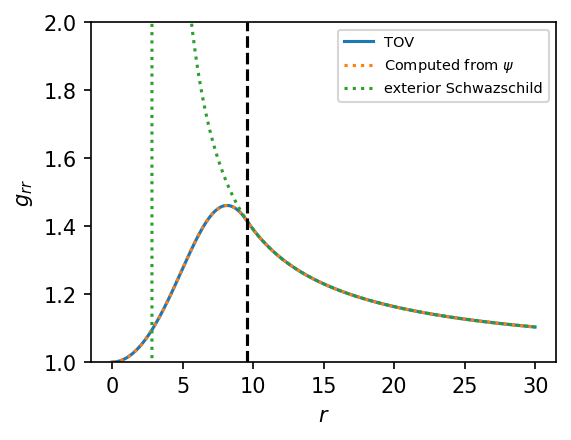

In [9]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(r,grr, label="TOV")
dphidr=np.diff(phi)/np.diff(r)
grr2 = (1-2*r[:-1]*dphidr/phi[:-1])**2
plt.plot(r[:-1],grr2,":", label="Computed from $\psi$")
plt.plot(r, 1./(1.-2*M/r), ":", label="exterior Schwazschild")
#plt.plot(r,dphidr)
#plt.yscale("log")
plt.xlabel(r"$r$")
plt.axvline(R, linestyle="--",color="black")
plt.ylim((1,2))
plt.ylabel(r"$g_{rr}$")
plt.legend(fontsize="x-small")
plt.show()


/tmp/ipykernel_3773223/718215289.py:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(riso, r/M*(1-np.sqrt(1-4*M/2/r)),":", label="exterior Schwarzschild (in terms of $r$)")


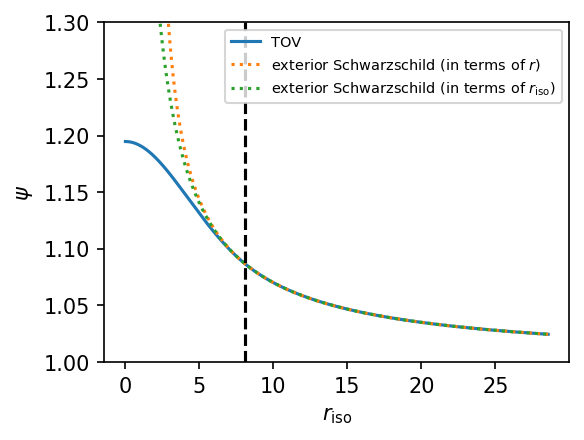

In [10]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(riso,phi, label="TOV")
plt.plot(riso, r/M*(1-np.sqrt(1-4*M/2/r)),":", label="exterior Schwarzschild (in terms of $r$)")
plt.plot(riso, 1+M/2/riso,":", label=r"exterior Schwarzschild (in terms of $r_{\rm iso}$)")
plt.xlabel(r"$r_{\rm iso}$")
plt.ylabel(r"$\psi$")
plt.ylim((1,1.3))
plt.axvline(Riso, linestyle="--",color="black")
plt.legend(fontsize="x-small")
plt.show()

/tmp/ipykernel_3773223/2305504682.py:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(r,np.sqrt(1-2*M/r),":", label="Exterior schwarzschild")


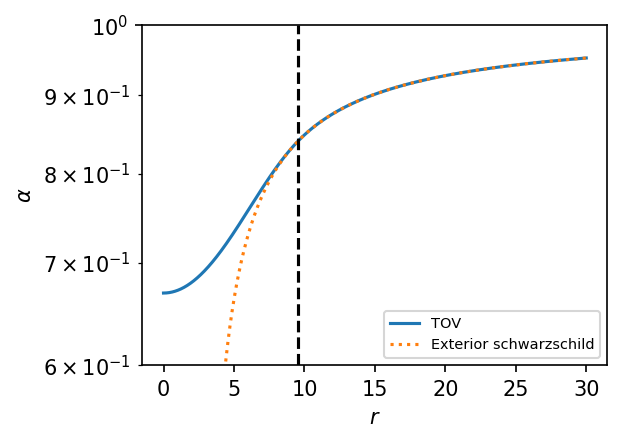

In [11]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(r,alpha, label="TOV")
plt.plot(r,np.sqrt(1-2*M/r),":", label="Exterior schwarzschild")
plt.ylabel(r"$\alpha$")
plt.yscale("log")
plt.xlabel(r"$r$")
plt.axvline(R, linestyle="--",color="black")
plt.ylim((0.6,1))
plt.legend(fontsize="x-small")
plt.show()

/tmp/ipykernel_3773223/2744076661.py:9: RuntimeWarning: invalid value encountered in true_divide
  Gp=np.diff(p)/np.diff(riso) /rhoh[:-1]


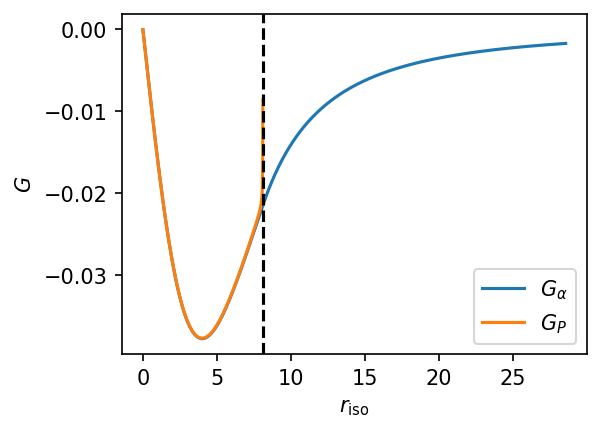

/tmp/ipykernel_3773223/2744076661.py:22: RuntimeWarning: invalid value encountered in true_divide
  Gp=np.diff(p)/np.diff(r) /rhoh[:-1]


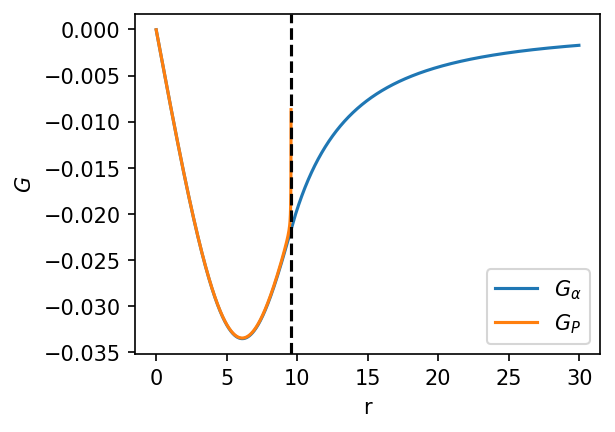

In [12]:
# rho*h = rho (1+eps) + P
rhoh = rho * (1 + eps) + p


plt.figure(figsize=(4,3),dpi=150)
# G computed from alpha
Ga=- np.diff(alpha)/np.diff(riso)/alpha[:-1]
# G computed from P
Gp=np.diff(p)/np.diff(riso) /rhoh[:-1]
plt.plot(riso[:-1],Ga, label=r"$G_\alpha$")
plt.plot(riso[:-1],Gp, label="$G_P$")
plt.axvline(Riso, linestyle="--",color="black")
plt.xlabel(r"$r_{\rm{iso}}$")
plt.ylabel("$G$")
plt.legend()
plt.show()

plt.figure(figsize=(4,3),dpi=150)
# G computed from alpha
Ga=- np.diff(alpha)/np.diff(r)/alpha[:-1]
# G computed from P
Gp=np.diff(p)/np.diff(r) /rhoh[:-1]
plt.plot(r[:-1],Ga, label=r"$G_\alpha$")
plt.plot(r[:-1],Gp, label="$G_P$")
plt.axvline(R, linestyle="--",color="black")
plt.xlabel("r")
plt.ylabel("$G$")
plt.legend()
plt.show()

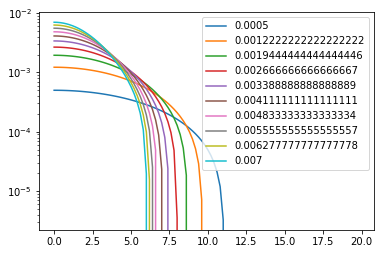

In [13]:
reload(tov)
plt.figure()
for rho0 in np.linspace(0.5e-3,7e-3, num=10):
    R, Riso, M, r, riso, rho, p, ene, cs2, alpha, grr, mass, phi = tov.tov(rho0,Gamma=2.0, Nout=100)
    plt.plot(r,rho,label=str(rho0))
plt.yscale("log")
plt.legend()
plt.show()

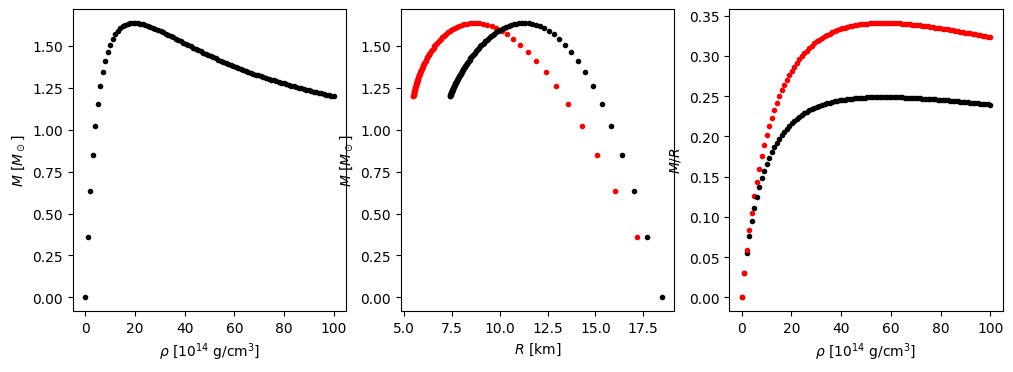

1.6368068600273378 0.0031077676120598837


In [27]:
Mmax=0
rho0_max=0
fig,ax=plt.subplots(1,3, figsize=(12,4), dpi=100)
for rho0_cgs in np.linspace(2e-13,1e16, num=100):
    rho0=rho0_cgs/rho_geom2cgs
    R, Riso, M, r, riso, rho, p, ene, cs2, alpha, grr, mass, phi = tov.tov(rho0,Gamma=2.0, Nout=100)
    if M>Mmax:
        Mmax=M
        rho0_max=rho[0]
    ax[0].plot(rho0_cgs/1e14,M,".",color="black")
    ax[0].set_xlabel(r"$\rho$ [$10^{14}$ g/cm$^3$]")
    ax[0].set_ylabel(r"$M$ [$M_\odot$]")
    ax[1].plot(R*L_geom2cgs*1e-5,M,".",color="black")
    ax[1].plot(Riso*L_geom2cgs*1e-5,M,".",color="red")
    ax[1].set_xlabel(r"$R$ [km]")
    ax[1].set_ylabel(r"$M$ [$M_\odot$]")
    ax[2].plot(rho0_cgs/1e14,M/R,".",color="black")
    ax[2].plot(rho0_cgs/1e14,M/Riso,".",color="red")
    ax[2].set_xlabel(r"$\rho$ [$10^{14}$ g/cm$^3$]")
    ax[2].set_ylabel(r"$M/R$")
plt.show()
print(Mmax, rho0_max)